<a href="https://colab.research.google.com/github/cicerohenjr/alura-imersao-dados-python/blob/main/aula03_analise_visual/aula03_graficos_visuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Carregando e limpando a base (Processo das Aulas 1 e 2)
url = "https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv"
df = pd.read_csv(url)

# Renomeando
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa_loc',
    'company_size': 'tamanho_empresa'
}, inplace=True)

# Removendo nulos e ajustando tipo
df_limpo = df.dropna()
df_limpo['ano'] = df_limpo['ano'].astype('int64')

# Verificando se está tudo pronto
df_limpo.head()

/tmp/ipython-input-2972151822.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['ano'] = df_limpo['ano'].astype('int64')


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa_loc,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


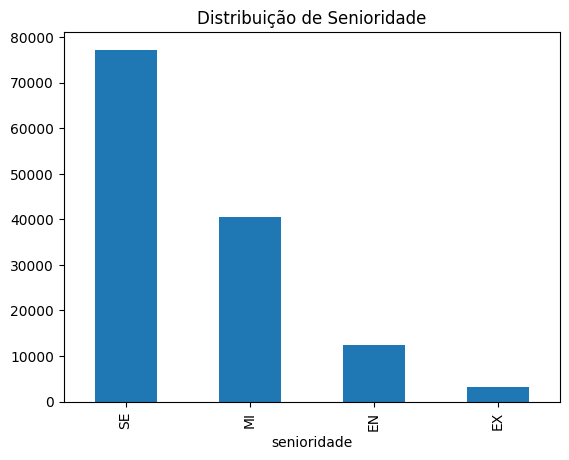

In [2]:
# Contagem de profissionais por senioridade
# kind='bar' cria o gráfico de barras
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade');

/tmp/ipython-input-153548583.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade, palette='viridis')


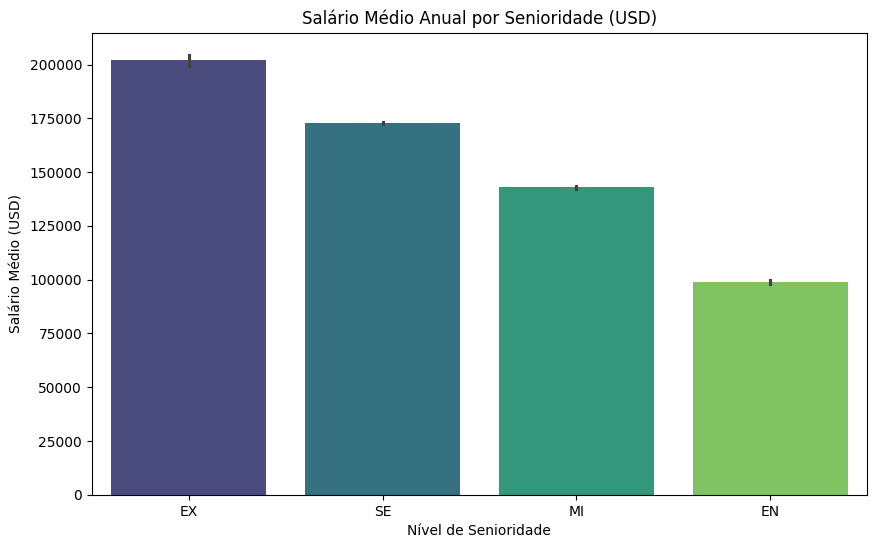

In [3]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Definindo a ordem das barras (do maior para o menor salário)
ordem_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

# Criando o Gráfico de Barras (Salário Médio por Senioridade)
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade, palette='viridis')

# Adicionando títulos e rótulos
plt.title('Salário Médio Anual por Senioridade (USD)')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio (USD)')
plt.show()

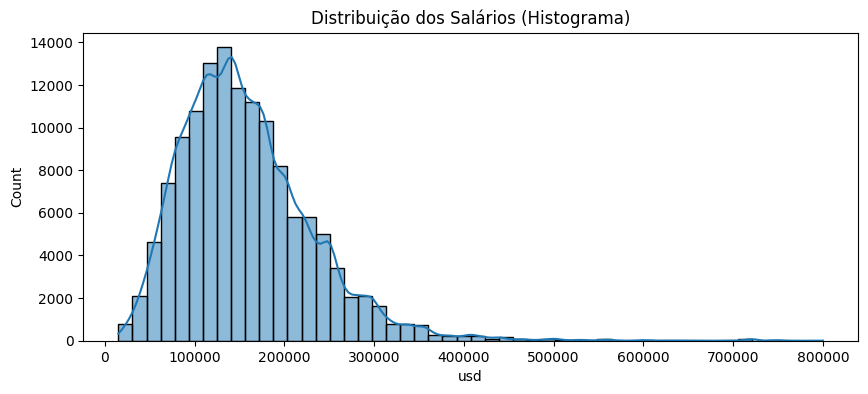

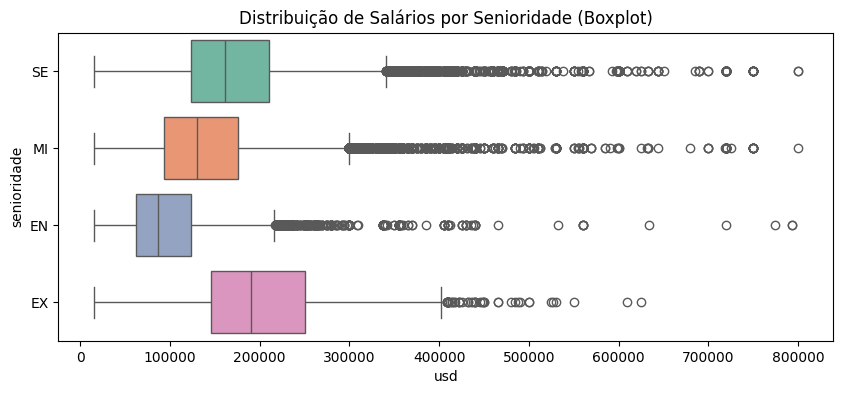

In [4]:
# Histograma: Mostra a frequência dos salários
plt.figure(figsize=(10, 4))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários (Histograma)')
plt.show()

# Boxplot: Mostra quartis e outliers (pontos fora da curva)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_limpo, x='usd', y='senioridade', palette='Set2', hue='senioridade')
plt.title('Distribuição de Salários por Senioridade (Boxplot)')
plt.show()

In [5]:
# Gráfico de Barras Interativo (Média Salarial)
# Agrupando os dados primeiro
media_salarial = df_limpo.groupby('senioridade')[['usd']].mean().sort_values('usd', ascending=False).reset_index()

fig = px.bar(media_salarial, x='senioridade', y='usd',
             title='Salário Médio por Senioridade (Interativo)',
             text_auto=True) # Mostra o valor na barra
fig.show()

In [6]:
# Preparando os dados para a pizza/rosca
contagem_remoto = df_limpo['remoto'].value_counts().reset_index()
contagem_remoto.columns = ['tipo_trabalho', 'quantidade']

# Criando o gráfico de rosca (hole=0.5 cria o buraco)
fig = px.pie(contagem_remoto, values='quantidade', names='tipo_trabalho',
             title='Proporção de Trabalho Remoto vs Presencial',
             hole=0.5)
fig.show()

In [7]:
# --- DESAFIO AULA 03 ---
# 1. Filtrar apenas Data Scientist
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# 2. Agrupar por empresa_loc (país) e calcular média salarial
media_pais = df_ds.groupby('empresa_loc')[['usd']].mean().reset_index()

# 3. Gerar o gráfico interativo (Top 15 países para não ficar poluído)
top_paises = media_pais.sort_values('usd', ascending=False).head(15)

fig = px.bar(top_paises, x='empresa_loc', y='usd',
             title='Salário Médio de Data Scientists por País (Top 15)',
             labels={'empresa_loc': 'País', 'usd': 'Salário Médio (USD)'})
fig.show()